In [24]:
import msprime
import tskit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [25]:
def migration_matrix(dimension,migration_rate):
    result=np.zeros((dimension,dimension))
    result[0,1]=migration_rate
    result[0,dimension-1]=migration_rate
    result[dimension-1,0]=migration_rate
    result[dimension-1,dimension-2]=migration_rate
    for i in range (1,dimension-1):
        for j in range(0,dimension):
            if j==i-1:
                result[i,j]=migration_rate
            elif j==i+1:
                result[i,j]=migration_rate
    result=result.tolist()
    for i in range(dimension):
        for j in range(dimension):
            if result[i][j]==0.0:
                result[i][j]=0            
    return result

In [35]:
Deme_density=400
population_configurations=[] #initiliazing the demes
L=300 #the number of demes 
sample_size=200 #deme sample size
trials=50 #number of trials
m=0.2 #migration rate
N=L*sample_size# total sample size
afs=np.zeros(N+1) #initializing average afs
matrix= migration_matrix(L,m)
mutationrate=5e-7



print("we want 1 <<< m*deme_density <<< number of demes to keep continous structure")
print("1 <<< ",m*Deme_density," <<< ",L )


we want 1 <<< m*deme_density <<< number of demes to keep continous structure
1 <<<  80.0  <<<  300


In [36]:
Effective_pop=(L**2)/(2*m*(np.pi)**2)
print("The effective population size via Maruyama equation is: ", Effective_pop)
real_pop=L*Deme_density
print("The real population size is", real_pop)

Theta_eff=2*Effective_pop*m
Theta_real=2*real_pop*m


The effective population size via Maruyama equation is:  22797.266319526
The real population size is 120000


In [28]:
a=0
for j in range (L):
    population_configurations.append(msprime.PopulationConfiguration(sample_size=sample_size))
for i in range(1,51):
    #print(population_configurations)


  
    ts2 = msprime.simulate(Ne=Deme_density, length=50e3, population_configurations=population_configurations, migration_matrix=matrix, mutation_rate=mutationrate)
    
    afs2 = ts2.allele_frequency_spectrum(polarised=True, span_normalise=False)
    
    x=np.arange(len(afs2))
    #print(afs2)
    #print(len(afs2))
    afs=afs+afs2
    #print(afs)
    #plt.rcParams["figure.figsize"] = (10,7)
    #plt.bar(x,afs2)
    #plt.xlim(0.4,len(afs2))
    #plt.figure()
    #plt.show()
    a=a+1
    print("iteration",a)
afs=afs/trials
plt.rcParams["figure.figsize"] = (80,30)
#plt.bar(x,afs)
#plt.xlim(0.4,len(afs))
#plt.title("Average allele frequency spectrum when 1<<m*N<<L")
#plt.figure()
#plt.show()

print(afs)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
[    0.   12003.56  5984.18 ...     0.       0.       0.  ]


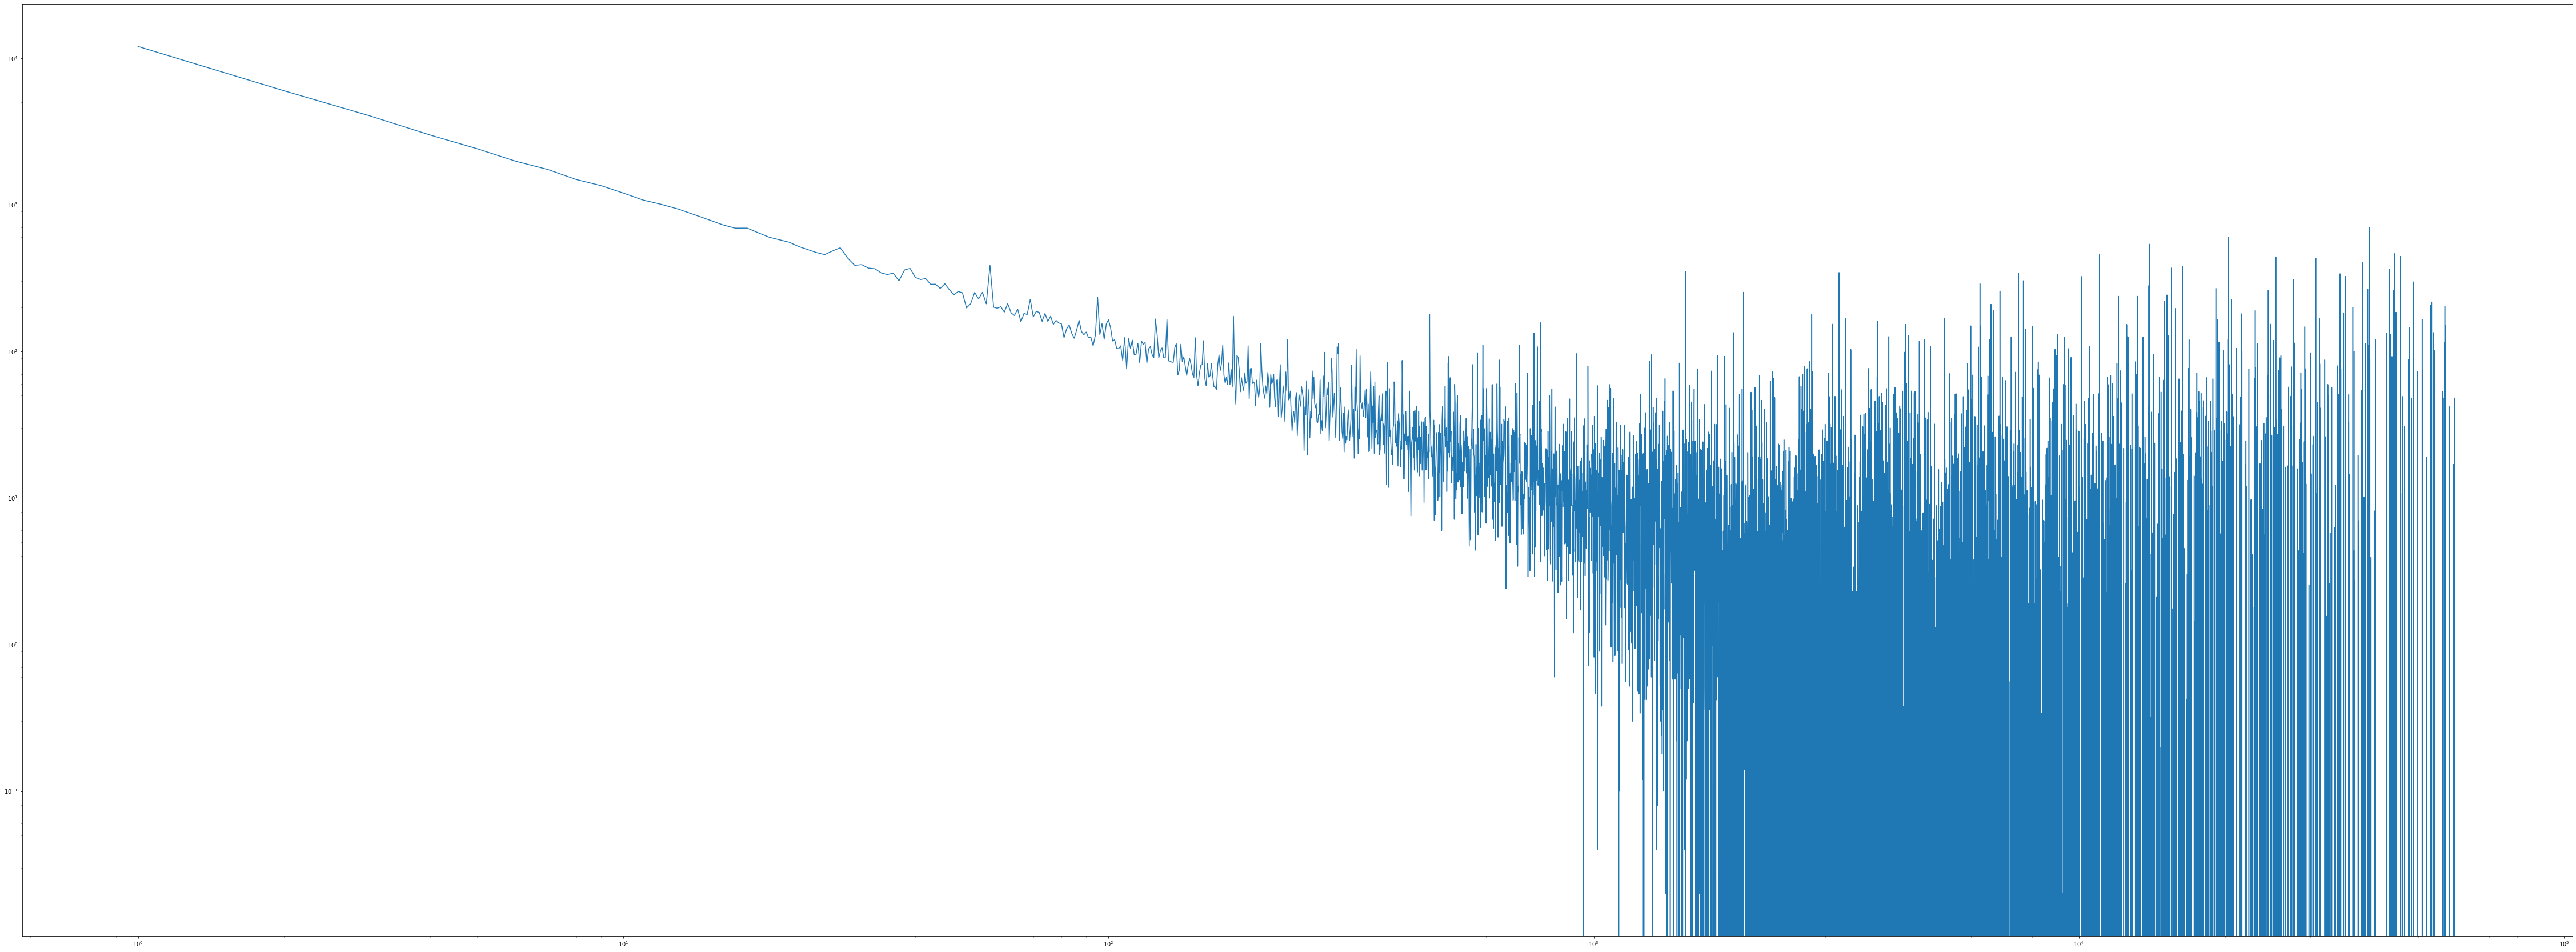

In [29]:
plt.rcParams["figure.figsize"] = (80,30)
x2=x[1:N+1]
afs2=afs[1:N+1]
plt.loglog(x2,afs2) 

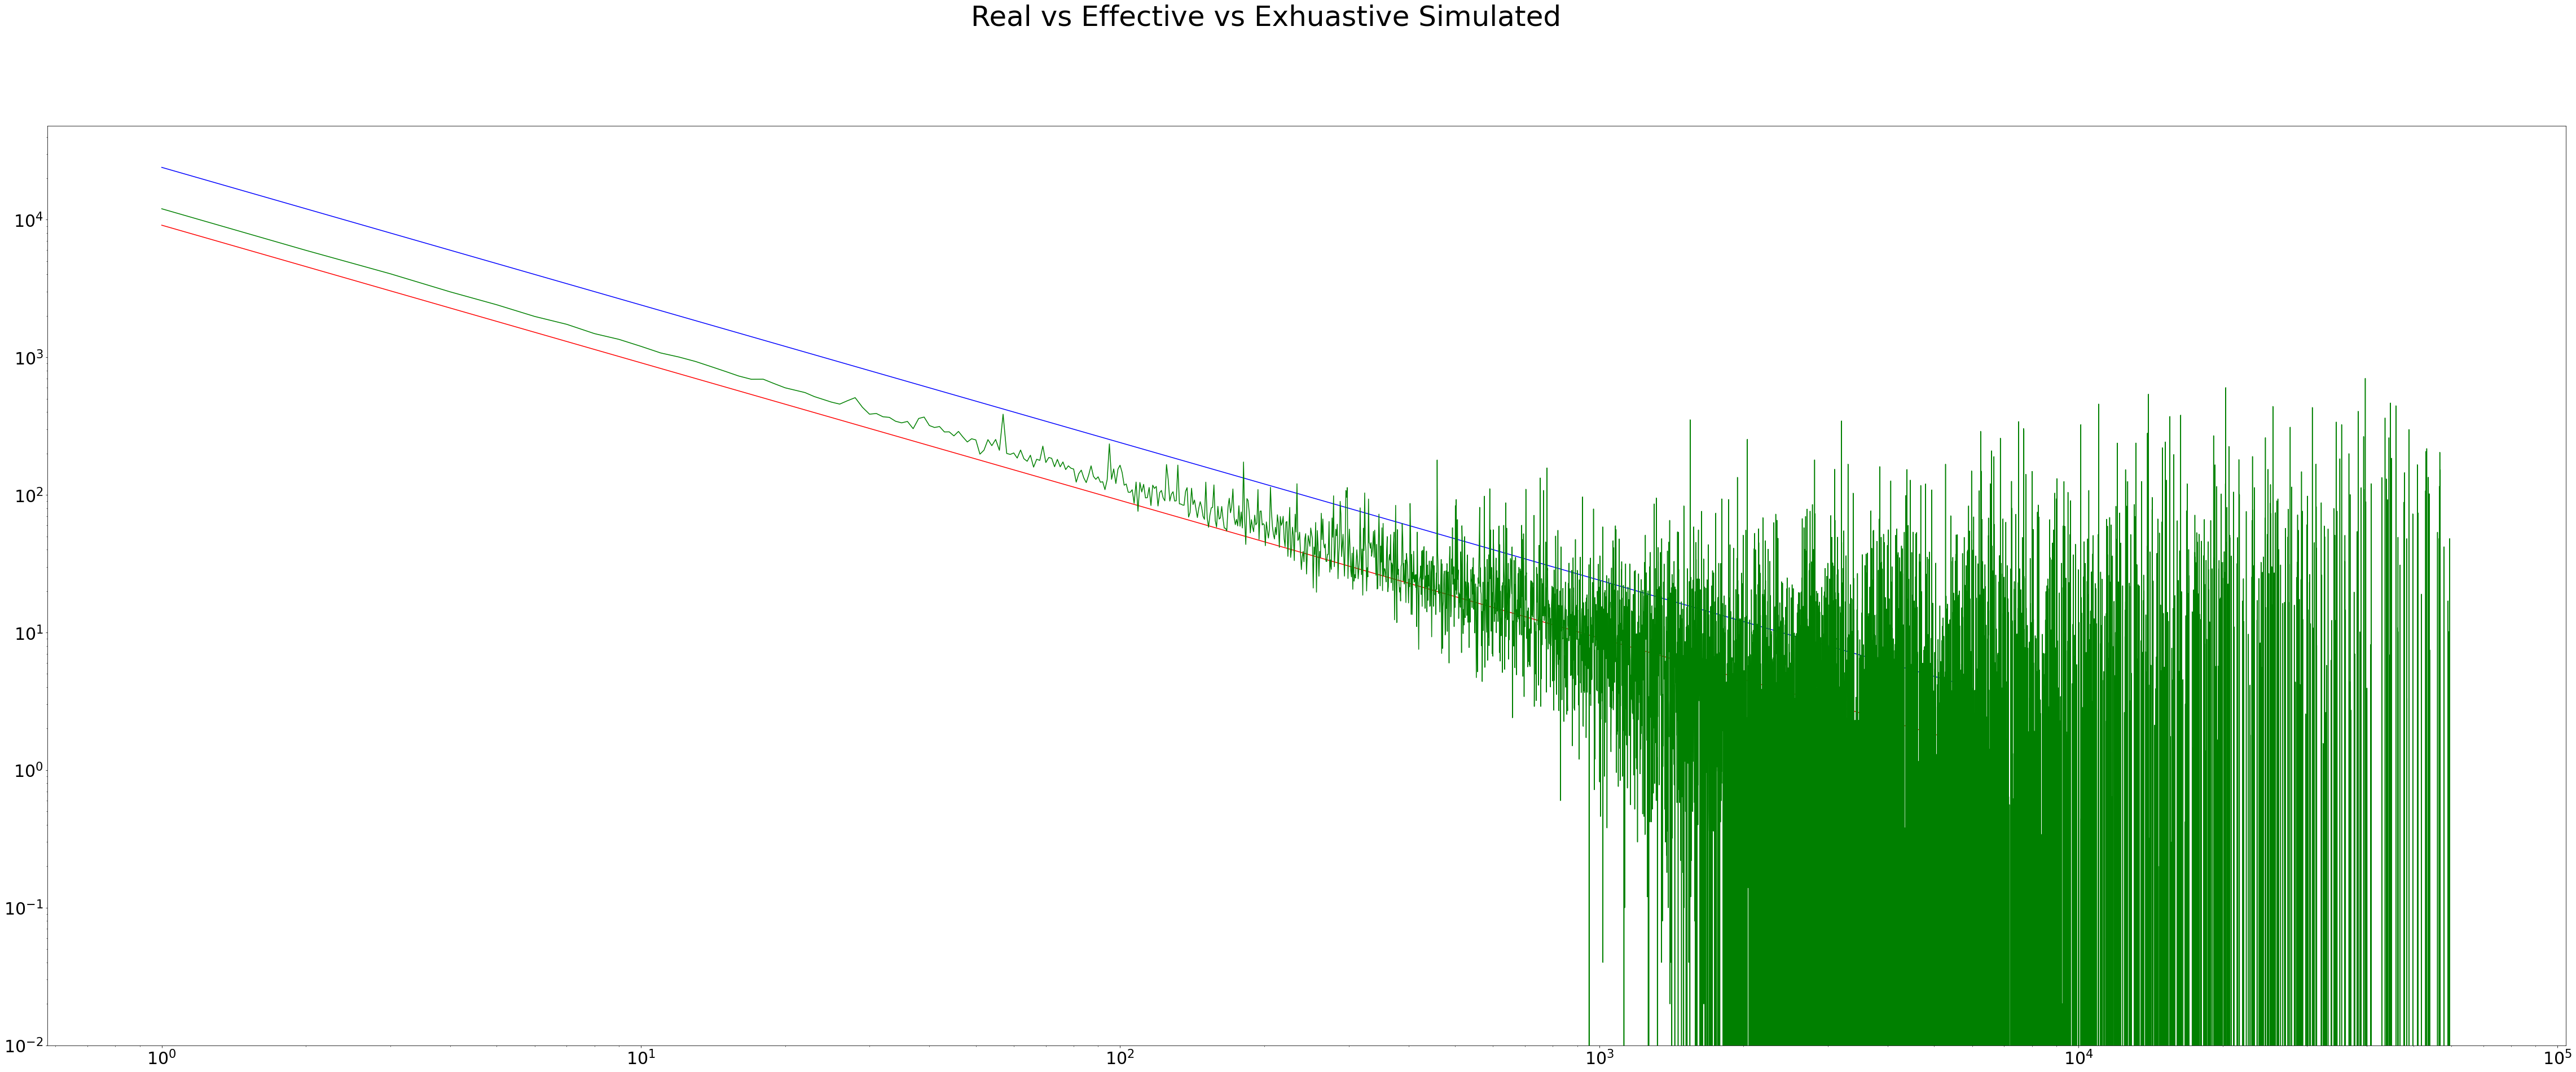

'effective=red, real =blue'

In [30]:
fig=plt.figure()
fig.suptitle('Real vs Effective vs Exhuastive Simulated', fontsize=50)
plt.xticks(size = 30)
plt.yticks(size = 30)

plt.loglog(np.arange(1,6000),Theta_eff/(np.arange(1,6000)),color="red")
plt.loglog(np.arange(1,6000),Theta_real/(np.arange(1,6000)), color="blue")
plt.loglog(x2,afs2,color="green") 

plt.show()
"effective=red, real =blue"